In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.rcParams["axes.unicode_minus"] = False
import warnings

warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import parser
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [2]:
features = pd.read_csv("C:/Users/zofld/Desktop/modeling/총승차승객수.csv", encoding="cp949")
features.head(5)
features.set_index('노선번호',inplace=True)
labels=features["총승차승객수"]
del features["총승차승객수"]
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=29
)

In [3]:
xgb_params = {
    "lambda": 0.0030282073258141168,
    "alpha": 0.01563845128469084,
    "colsample_bytree": 0.5,
    "subsample": 0.7,
    "n_estimators": 4000,
    "learning_rate": 0.05,
    "max_depth": 6,
    "random_state": 2020,
}
reg2 = XGBRegressor(**xgb_params)

In [4]:
train_features, test_features, train_labels, test_labels
reg2.fit(
    train_features,
    train_labels,
    eval_set=[(train_features, train_labels), (test_features, test_labels)],
    eval_metric="mae",
    early_stopping_rounds=100,
    verbose=100,
)

[0]	validation_0-mae:370382.90625	validation_1-mae:417301.56250
[100]	validation_0-mae:16014.85547	validation_1-mae:116766.47656
[200]	validation_0-mae:3632.03223	validation_1-mae:117853.28906
[226]	validation_0-mae:2637.37500	validation_1-mae:117767.21875


XGBRegressor(alpha=0.01563845128469084, base_score=0.5, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', lambda=0.0030282073258141168,
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=4000, n_jobs=8, num_parallel_tree=1,
             random_state=2020, reg_alpha=0.015638452, reg_lambda=0.00302820723,
             scale_pos_weight=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [5]:
predictions = reg2.predict(test_features)
errors = abs(predictions - test_labels)
print("RMSE : ", round(mean_squared_error(test_labels, predictions)**0.5, 2))
print("MAE : ", round(np.mean(errors), 2))
mape = 100 * (errors / test_labels)
print("MAPE : ", np.mean(mape))
accuracy = 100 - np.mean(mape)
print("Accuracy:", round(accuracy, 5), "%.")

RMSE :  158648.02
MAE :  115954.9
MAPE :  25.826369795237756
Accuracy: 74.17363 %.


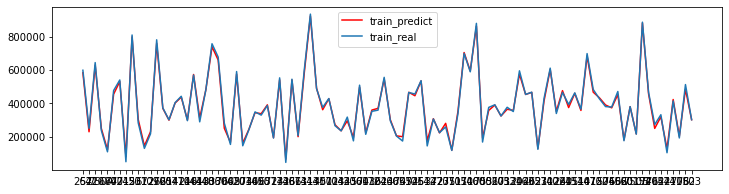

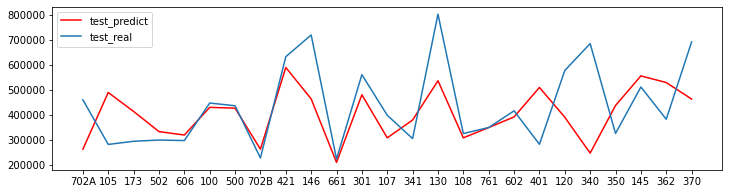

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_predictions = reg2.predict(train_features)
test_predictions = reg2.predict(test_features)
plt.figure(figsize=(12,3))
plt.plot(train_predictions, label = 'train_predict', color = 'red')
plt.plot(train_labels, label = 'train_real')
plt.legend()
plt.show()

plt.figure(figsize=(12,3))
plt.plot(test_predictions, label = 'test_predict', color = 'red')
plt.plot(test_labels, label = 'test_real')
plt.legend()
plt.show()